In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('House.csv')

## Data Preprocessing and Data Cleaning
- Handling Missing Values
- Handling Duplicates
- Handling Outliers
- Check Statistical Summary
- Check Uniques Values

In [3]:
df.describe(include='number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

In [7]:
df['bathrooms'] = df['bathrooms'].astype(np.int32)
df['bedrooms'] = df['bedrooms'].astype(np.int32)

In [ ]:
df.drop(columns=['date', 'street', 'statezip'], inplace=True)

## Observation

In [ ]:
# ada banyak outlier, challengenya adalah menghilangkan outlier tanpa mengurangi terlalu banyak data kita

print(df['price'].max())
print(df['price'].min())

26590000.0
0.0


In [10]:
df['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

### Outlier Price Columns

In [11]:
# max price nya sampe 26juta? jadi kita kecil kan saja
df = df[~(df['price']>2590000.0)]
df['price'].describe()

count    4.585000e+03
mean     5.349604e+05
std      3.274183e+05
min      0.000000e+00
25%      3.220000e+05
50%      4.600000e+05
75%      6.500000e+05
max      2.560498e+06
Name: price, dtype: float64

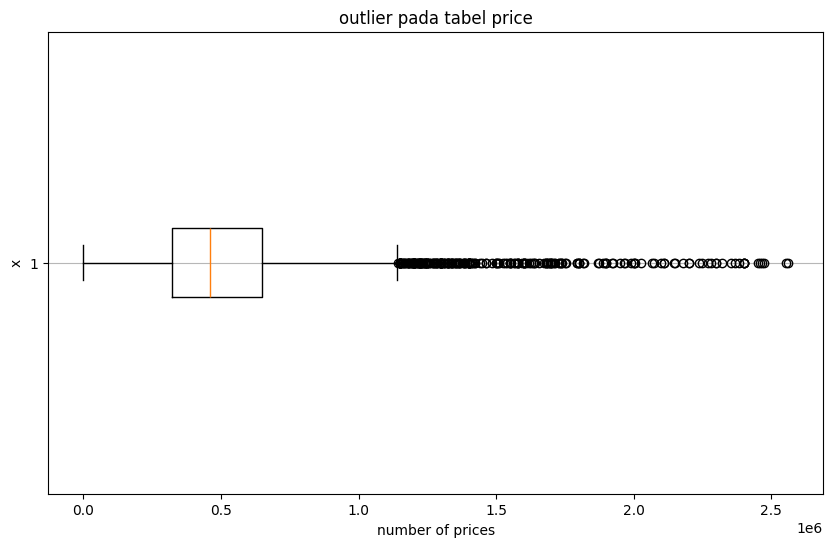

In [ ]:
# Setelah di pangkas
plt.figure(figsize=(10,6))
plt.boxplot(df['price'], vert=False)
plt.title('outlier pada tabel price')
plt.xlabel('number of prices')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.9)
plt.show()

In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,year
count,4.585000e+03,4585.000000,4585.000000,4585.000000,4.585000e+03,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.0
mean,5.349604e+05,3.396947,1.782552,2127.319738,1.482985e+04,1.511014,0.006325,0.234896,3.451254,1819.065649,308.254089,1970.765758,808.631843,2014.0
std,3.274183e+05,0.905861,0.742062,931.474750,3.593001e+04,0.537875,0.079286,0.767469,0.677060,846.305342,454.087654,29.739842,979.407576,0.0
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,2014.0
25%,3.220000e+05,3.000000,1.000000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,2014.0
50%,4.600000e+05,3.000000,2.000000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2014.0
75%,6.500000e+05,4.000000,2.000000,2610.000000,1.097000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,2014.0
max,2.560498e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4130.000000,2014.000000,2014.000000,2014.0


### Outlier Luas persegi Ruang Tamu

In [14]:
df = df[~(df['sqft_living']>6000)]
df['sqft_living'].describe()

count    4572.000000
mean     2112.839239
std       886.462155
min       370.000000
25%      1460.000000
50%      1970.000000
75%      2602.500000
max      5990.000000
Name: sqft_living, dtype: float64

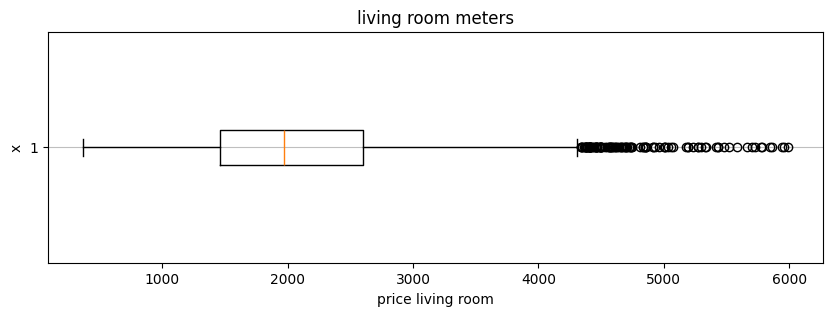

In [15]:
plt.figure(figsize=(10,3))
plt.boxplot(df['sqft_living'], vert=False)
plt.title('living room meters')
plt.xlabel('price living room')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.8)
plt.show()

In [16]:
df
# data tersisa 4.500, jadi masih aman

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country,day,month,year
0,3.130000e+05,3,1,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA,Friday,May,2014
1,2.384000e+06,5,2,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA,Friday,May,2014
2,3.420000e+05,3,2,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA,Friday,May,2014
3,4.200000e+05,3,2,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA,Friday,May,2014
4,5.500000e+05,4,2,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA,Friday,May,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,USA,Wednesday,July,2014
4596,5.343333e+05,3,2,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,USA,Wednesday,July,2014
4597,4.169042e+05,3,2,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,USA,Wednesday,July,2014
4598,2.034000e+05,4,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,USA,Thursday,July,2014


### Outlier Luas persegi tanah Columns
liat juga data lainnya

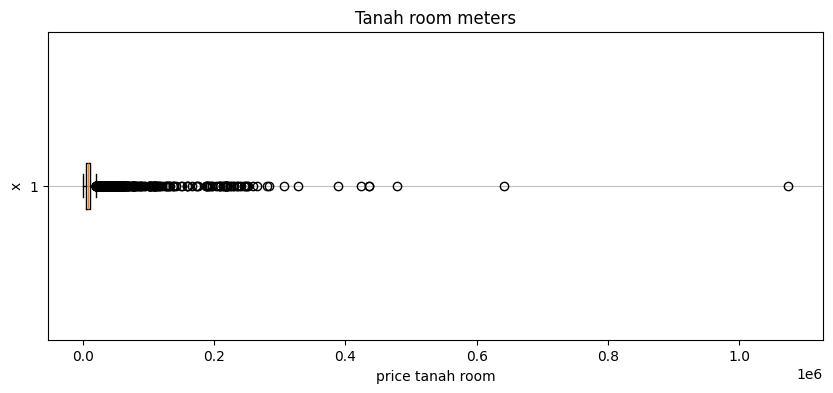

In [17]:
# sebelum di pangkas
plt.figure(figsize=(10,4))
plt.boxplot(df['sqft_lot'], vert=False)
plt.title('Tanah room meters')
plt.xlabel('price tanah room')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.8)
plt.show()

In [ ]:
df['sqft_lot'] = np.log(df['sqft_lot'])
# Seperti yang bisa kita liat diats, datanya miring ke kiri dan semua masih normal, gaada outlier.  
# Kita bisa melakukan yang namanya transformasi logaritmik
# Jadi distribusi datanya bisa jadi lebih baik. pengertiannya cari aja di GPT

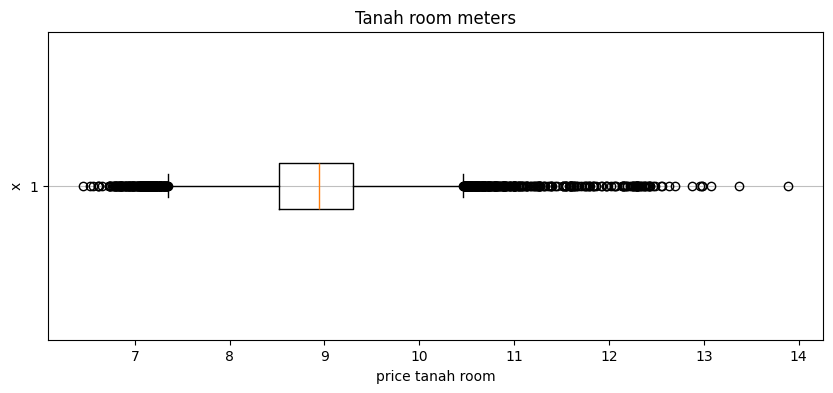

In [19]:
# sesudah di pangkas
plt.figure(figsize=(10,4))
plt.boxplot(df['sqft_lot'], vert=False)
plt.title('Tanah room meters')
plt.xlabel('price tanah room')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.8)
plt.show()

### Outlier Luas persegi kaki semua ruang di atas tanah.

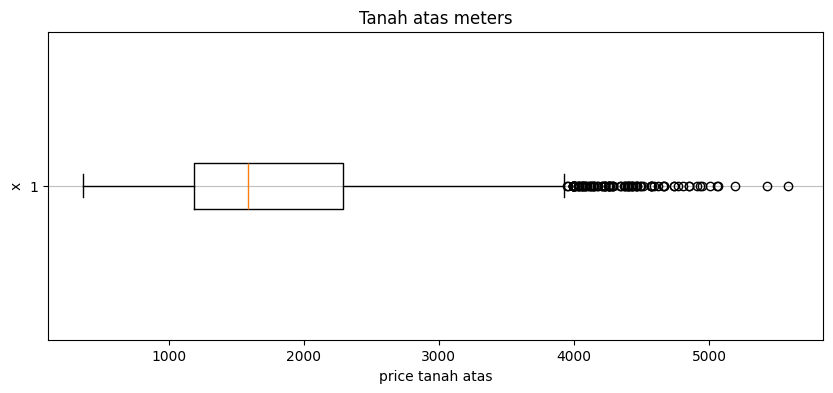

In [ ]:
# sebelum di pangkas
plt.figure(figsize=(10,4))
plt.boxplot(df['sqft_above'], vert=False)
plt.title('Tanah atas meters')
plt.xlabel('price tanah atas')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.8)
plt.show()

In [21]:
# sebenar nya cukup aman, tapi kita potong saja lagi
df = df[~(df['sqft_above']>4600)]

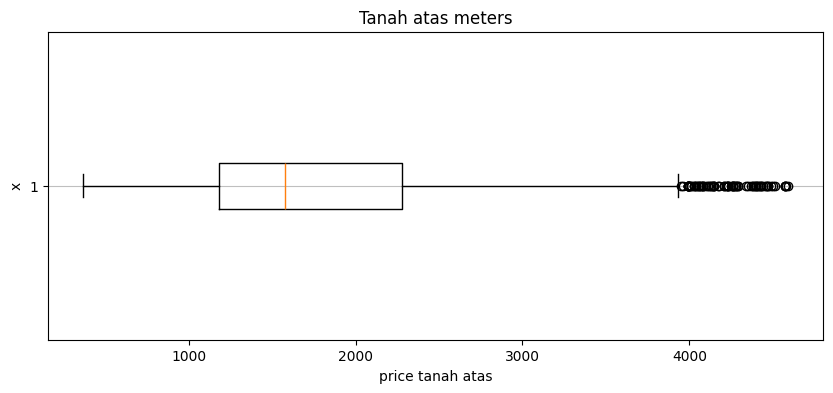

In [22]:
# setelah di pangkas

plt.figure(figsize=(10,4))
plt.boxplot(df['sqft_above'], vert=False)
plt.title('Tanah atas meters')
plt.xlabel('price tanah atas')
plt.ylabel('x')
plt.grid(axis='y', alpha=0.8)
plt.show()

# Membersihkan Data Categorical
### Bedrooms

In [23]:
df['bedrooms'].value_counts()
# ada rumah ga punya kamar tuh ga ngotak!, jadi pangkas 1-6

bedrooms
3    2030
4    1511
2     566
5     336
6      57
1      38
7      11
8       2
9       1
0       1
Name: count, dtype: int64

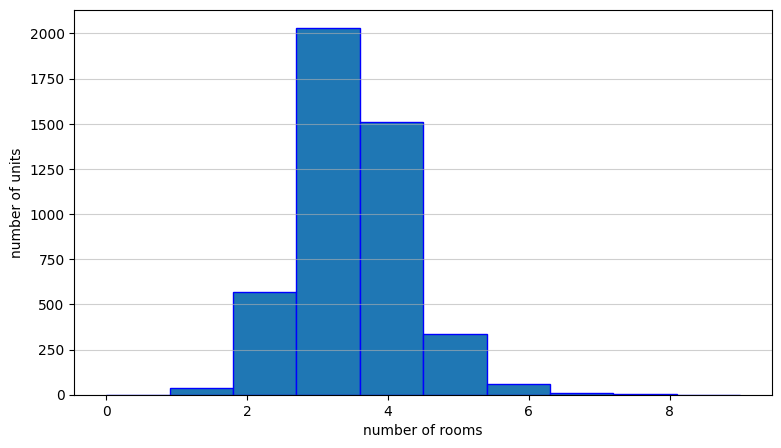

In [24]:
plt.figure(figsize=(9,5))
plt.hist(df['bedrooms'], edgecolor='blue')
plt.xlabel('number of rooms')
plt.ylabel('number of units')
plt.grid(axis='y', alpha=0.6)
plt.show()

In [25]:
df = df[(df['bedrooms']>=1) & (df['bedrooms']<=6)]
# AI version ternyata agak panjang tapi mudah dipahami logika nya

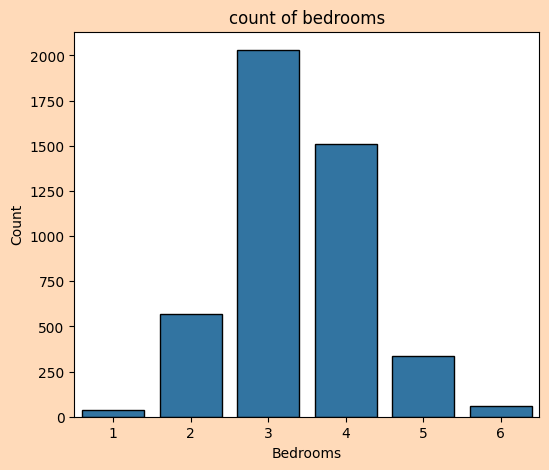

bedrooms
3    2030
4    1511
2     566
5     336
6      57
1      38
Name: count, dtype: int64


In [26]:
# visualisasi dan total bedrooms yang sudah di pangkas

fig, axis = plt.subplots(figsize=(6,5))
fig.patch.set_facecolor('#FFDAB9')
sns.countplot(x='bedrooms', data=df, ax=axis, edgecolor='black')
axis.set_title('count of bedrooms')
axis.set_xlabel('Bedrooms')
axis.set_ylabel('Count')
axis.set_facecolor('#FFFFFF')
plt.show()

print(df['bedrooms'].value_counts())

### Bathrooms Columns

In [27]:
df['bathrooms'].value_counts()      # siapa yg mau punya rumah gada WC?

bathrooms
2    2305
1    1666
3     484
4      59
0      17
5       7
Name: count, dtype: int64

In [28]:
df = df[~(df['bathrooms']==0)]

In [29]:
df['bathrooms'].value_counts()      # DONE

bathrooms
2    2305
1    1666
3     484
4      59
5       7
Name: count, dtype: int64

### City Columns

In [30]:
df['city'].value_counts()

city
Seattle                1554
Renton                  291
Bellevue                273
Redmond                 230
Kirkland                185
Issaquah                183
Kent                    183
Sammamish               175
Auburn                  174
Federal Way             146
Shoreline               122
Woodinville             112
Maple Valley             96
Mercer Island            82
Burien                   72
Snoqualmie               68
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         35
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   27
Enumclaw                 27
Carnation                19
Normandy Park            18
Clyde Hill               10
Fall City                 9
Black Diamond             9
Ravensdale                7
Medina                    7
Pacific        

In [ ]:
# kota yg dibawah 50 akan diberi nama other agar tidak banyak menyimpan categorical
a = df['city'].value_counts()
b = a[a<50]

In [ ]:
df['city'] = df['city'].apply(lambda x: 'other' if x in b.index else x)
# ketika city ada di b(dibawah 50) maka akan diberi nama "other"

In [33]:
df['city'].value_counts()

city
Seattle          1554
other             401
Renton            291
Bellevue          273
Redmond           230
Kirkland          185
Issaquah          183
Kent              183
Sammamish         175
Auburn            174
Federal Way       146
Shoreline         122
Woodinville       112
Maple Valley       96
Mercer Island      82
Burien             72
Snoqualmie         68
Kenmore            66
Des Moines         58
North Bend         50
Name: count, dtype: int64

### Floors Columns

In [ ]:
df['floors'].value_counts()     #gimana konsepnya ada lantai 2 setengah? wkwkw

floors
1.0    2150
2.0    1764
1.5     441
3.0     126
2.5      39
3.5       1
Name: count, dtype: int64

In [ ]:
df['floors'] = df['floors'].astype(int)     # 3.5 masih masuk dalam integer 3
df['floors'].value_counts()

floors
1    2591
2    1803
3     127
Name: count, dtype: int64

### Year Renovated Columns

In [36]:
df['yr_renovated'].value_counts()

yr_renovated
0       2689
2000     165
2003     146
2001     107
2009     106
2005      94
2004      74
2014      71
2006      67
2013      61
1923      57
1994      55
1989      54
2011      53
2012      45
1988      42
2008      42
2002      41
1983      41
1999      41
1998      40
1993      39
1912      33
1992      32
1979      32
2010      30
1985      29
1997      28
1982      22
1996      20
1972      17
1990      16
1956      15
1963      12
1969      11
1970       9
1968       9
1984       9
1954       8
1945       7
1974       6
1934       6
2007       6
1958       5
1986       5
1971       5
1978       3
1955       2
1980       2
1995       2
1981       1
1953       1
1987       1
1966       1
1960       1
1948       1
1991       1
1913       1
1977       1
1975       1
Name: count, dtype: int64

In [ ]:
a = df['yr_renovated'].value_counts()       # ada banyak rumah yg belum pernah di renov
b = a[a!=0]

In [ ]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x !=0 else x)
df['yr_renovated'].value_counts()       #rumah yg sudah direnov diubah jadi 1 artinya True

yr_renovated
0    2689
1    1832
Name: count, dtype: int64

# Feature Engineering

In [40]:
# Total square footage: memberikan informasi langsung kepada model tentang total luas bangunan di dalam rumah, 
# yang merupakan faktor penting dalam menentukan harga.
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

# House age at time of sale
df['house_age'] = df['year'] - df['yr_built']
# Tanggal pembangunan (yr_built) saja tidak selalu cukup untuk model. Usia rumah (house_age) adalah fitur yang 
# lebih langsung dan sering kali lebih berkorelasi dengan harga rumah. Rumah yang lebih tua mungkin memiliki nilai
# lebih rendah (karena memerlukan lebih banyak perbaikan) atau lebih tinggi (karena nilai historisnya), dan model 
# akan lebih mudah menangkap pola ini dari fitur house_age.

In [41]:
# memberikan informasi yang lebih spesifik tentang berapa lama sejak rumah itu direnovasi, yang bisa menjadi 
# faktor penting dalam menentukan harga.
df['since_renovated'] = df.apply(lambda x: x['year'] - x['yr_renovated'] if x['yr_renovated'] > 0 else 0, axis=1)

# Bathrooms per bedroom
df['bath_per_bed'] = df.apply(lambda x: x['bathrooms'] / x['bedrooms'] if x['bedrooms'] != 0 else 0, axis=1)
# memberikan gambaran tentang "kepadatan" kamar mandi di rumah. Rasio ini bisa menjadi fitur yang kuat karena 
# menunjukkan tingkat kenyamanan atau kemewahan rumah, yang berpotensi memiliki korelasi yang kuat dengan harga.

In [42]:
# memberikan informasi tentang kepadatan bangunan di atas tanah. Rasio yang tinggi bisa menunjukkan properti 
# dengan halaman yang luas, sedangkan rasio yang rendah menunjukkan properti dengan bangunan yang relatif besar 
# dibandingkan dengan luas tanahnya. Ini bisa menjadi faktor penting dalam menentukan harga properti.
df['lot_living_ratio'] = df.apply(lambda x: x['sqft_lot'] / x['sqft_living'] if x['sqft_living'] != 0 else 0, axis=1)

# Has basement (binary)
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
# Kolom baru has_basement adalah fitur biner (0 atau 1) yang secara eksplisit memberitahu model apakah sebuah 
# rumah memiliki ruang bawah tanah atau tidak. Ini sering kali lebih efektif daripada menggunakan nilai 
# sqft_basement secara langsung karena memberikan informasi kategori yang jelas.

In [43]:
# Tujuan: Jumlah total ruangan di rumah adalah faktor yang sangat penting dalam menentukan harga. Dengan membuat 
# fitur ini, kita memberikan model informasi langsung tentang ukuran dan fungsionalitas properti dari sudut pandang 
# jumlah ruangan, yang mungkin lebih bermakna daripada melihat bedrooms dan bathrooms secara terpisah.
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

df['avg_room_size'] = df.apply(lambda x: x['sqft_living'] / (x['bedrooms'] + x['bathrooms']) if (x['bedrooms'] + x['bathrooms']) != 0 else 0, axis=1)
# Tujuan: Kolom baru avg_room_size memberikan wawasan yang berharga tentang seberapa luas setiap ruangan di rumah. 
# Fitur ini dapat menangkap informasi tentang kualitas atau kemewahan properti. Misalnya, rumah dengan jumlah 
# ruangan yang sama tetapi sqft_living yang lebih besar akan memiliki avg_room_size yang lebih tinggi dan mungkin 
# dianggap lebih bernilai.

In [44]:
df['above_per_floor'] = df.apply(lambda x: x['sqft_above'] / x['floors'] if x['floors'] != 0 else 0, axis=1)

In [45]:
df['price_per_sqft'] = df.apply(lambda x: x['price'] / x['sqft_living'] if x['sqft_living'] != 0 else 0, axis=1)

# is recently renovated (last 10 years)
df['recently_renovated'] = df.apply(lambda x: 1 if x['yr_renovated'] != 0 and (x['year'] - x['yr_renovated']) <= 10 else 0, axis=1)

In [46]:
df['basement_ratio'] = df.apply(lambda x: x['sqft_basement'] / x['total_sqft'] if x['total_sqft'] != 0 else 0, axis=1)

# Floor × bedrooms
df['floor_room_capacity'] = df['floors'] * df['bedrooms']

In [47]:
df['living_to_total_ratio'] = df.apply(lambda x: x['sqft_living'] / x['total_sqft'] if x['total_sqft'] != 0 else 0, axis=1)

In [48]:
df['age_when_renovated'] = df.apply(lambda x: x['yr_renovated'] - x['yr_built'] if x['yr_renovated'] > 0 else 0, axis=1)

In [49]:
df['loc_cond_index'] = df['view'] * df['condition']

In [50]:
df['living_per_floor'] = df.apply(lambda x: x['sqft_living'] / x['floors'] if x['floors'] != 0 else 0, axis=1)

In [51]:
df['lot_total_ratio'] = df.apply(lambda x: x['sqft_lot'] / x['total_sqft'] if x['total_sqft'] != 0 else 0, axis=1)

In [52]:
# Condition per bedroom
df['cond_per_bedroom'] = df.apply(lambda x: x['condition'] / x['bedrooms'] if x['bedrooms'] != 0 else 0, axis=1)

# View per dollar
df['view_price_ratio'] = df.apply(lambda x: x['view'] / x['price'] if x['price'] != 0 else 0, axis=1)

In [53]:
cate_col = df.select_dtypes(include='object').columns.tolist()
number_col = df.select_dtypes(include='number').columns.tolist()
number_col.remove('price')

In [76]:
cate_col

['city', 'country', 'day', 'month']

In [55]:
df.isna().sum()

price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
city                     0
country                  0
day                      0
month                    0
year                     0
total_sqft               0
house_age                0
since_renovated          0
bath_per_bed             0
lot_living_ratio         0
has_basement             0
total_rooms              0
avg_room_size            0
above_per_floor          0
price_per_sqft           0
recently_renovated       0
basement_ratio           0
floor_room_capacity      0
living_to_total_ratio    0
age_when_renovated       0
loc_cond_index           0
living_per_floor         0
lot_total_ratio          0
cond_per_bedroom         0
v

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4521 entries, 0 to 4599
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  4521 non-null   float64
 1   bedrooms               4521 non-null   int32  
 2   bathrooms              4521 non-null   int32  
 3   sqft_living            4521 non-null   int64  
 4   sqft_lot               4521 non-null   float64
 5   floors                 4521 non-null   int64  
 6   waterfront             4521 non-null   int64  
 7   view                   4521 non-null   int64  
 8   condition              4521 non-null   int64  
 9   sqft_above             4521 non-null   int64  
 10  sqft_basement          4521 non-null   int64  
 11  yr_built               4521 non-null   int64  
 12  yr_renovated           4521 non-null   int64  
 13  city                   4521 non-null   object 
 14  country                4521 non-null   object 
 15  day      

In [57]:
df = pd.get_dummies(df, columns=cate_col, drop_first=True)

In [58]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Woodinville,city_other,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_June,month_May
0,3.130000e+05,3,1,1340,8.976136,1,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,True
1,2.384000e+06,5,2,3650,9.110520,2,0,4,5,3370,...,False,False,False,False,False,False,False,False,False,True
2,3.420000e+05,3,2,1930,9.388235,1,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,True
3,4.200000e+05,3,2,2000,8.990940,1,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,True
4,5.500000e+05,4,2,1940,9.259131,1,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510,8.757784,1,0,0,4,1510,...,False,False,False,False,False,False,False,True,False,False
4596,5.343333e+05,3,2,1460,8.932345,2,0,0,3,1460,...,False,False,False,False,False,False,False,True,False,False
4597,4.169042e+05,3,2,3010,8.855663,2,0,0,3,3010,...,False,False,False,False,False,False,False,True,False,False
4598,2.034000e+05,4,2,2090,8.799360,1,0,0,3,1070,...,False,False,False,False,False,True,False,False,False,False


# MODELLING

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [59]:
x = df.drop(columns=['price'])
y = df['price']

In [60]:
y.isna().sum()

np.int64(0)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR()
}

In [68]:
pipelines = []

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    print(f'Pipeline for: {name}')
    display(pipe)
    pipelines.append((name, pipe))

Pipeline for: LinearRegression


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


Pipeline for: DecisionTree


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2


Pipeline for: RandomForest


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


Pipeline for: SVR


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


In [70]:
for name, model in models.items():
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    model_pipeline.fit(X_train, Y_train)
    y_predict = model_pipeline.predict(X_test)

    r2 = r2_score(Y_test, y_predict)
    mae = mean_absolute_error(Y_test, y_predict)
    mse = mean_squared_error(Y_test, y_predict)
    rmse = root_mean_squared_error(Y_test, y_predict)

    print(f'{name} ->R2:{r2:.4f},\tMAE:{mae:.4f}\tMSE:{mse:.4f}\tRMSE:{rmse:.4f} ')


LinearRegression ->R2:0.8663,	MAE:62891.8577	MSE:15341230770.8715	RMSE:123859.7221 
DecisionTree ->R2:0.9522,	MAE:25033.0303	MSE:5480650616.9785	RMSE:74031.4164 
RandomForest ->R2:0.9723,	MAE:11756.1048	MSE:3176174741.0874	RMSE:56357.5615 
SVR ->R2:-0.0449,	MAE:226833.5773	MSE:119894044820.7848	RMSE:346257.1946 
